## Chapter 4. 신경망 학습

* 학습 : 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득 
    * 손실함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표 
        * 손실함수 : 신경망이 학습할 수 있도록 해주는 지표
        * 경사법 : 함수의 기울기를 활용해 손실함수를 작게 만드는 기법 
    
#### 4.1 데이터에서 학습한다!
* 데이터 주도 학습
    * 신경망의 특징 : 데이터를 보고 학습할 수 있음
        * 가중치 매개 변수의 값을 데이터를 보고 자동으로 결정
    * 직선으로 분리할 수 있는 문제라면 데이터로 부터 자동으로 학습 할 수 있음    
        * 퍼셉트론 수렴 정리 : 선형 분리 가능 문제는 유한 번의 학습을 통해 풀수 있음 

* 기계 학습 : 데이터에서 답을 찾고, 패턴을 발견하고, 데이터로 이야기를 만듬 
    * 딥러닝 : 기존 기계학습에서 사용하던 방법보다 사람의 개입을 더욱 배제할 수 있게 해주는 중요한 특성을 지님 

* ex. 손글씨 5를 제대로 분류하는 프로그램
    * 이미지에서 특징(feature)을 추출, 그 특징의 패턴을 기계학습 기술로 학습하는 방법
        * feature(특징) : 입력 데이터(입력 이미지)에서 본질적인 데이터(중요한 데이터)를 정확하게 추출할 수 있도록 변환기
        * 이미지의 특징은 주로 벡터로 기술한다.
        * 컴퓨터 비전 분야에서는 SIFT, SURF, HOG등의 특징을 많이 사용함(사람이 생각한 특징)
            * 이런 특징을 이용해 데이터를 벡터로 변환
        * 변환된 벡터를 가지고 지도학습 방식의 대표 분류 기법 SVM,KNN등으로 학습(기계 학습)
            * 이와 같은 기계학습 : 모아진 데이터로부터 규칙을 찾아내는 역할을 '기계'가 담당
            * 이미지를 벡터로 변환할 때 사용하는 특징은 여전히 '사람'이 설계하는 것
                * 문제에 적합한 특징을 쓰지 않으면 (혹은 특징을 설계하지 않으면) 좋은 결과를 얻기 힘듬
    * 신경망 : 이미지를 있는 그대로 학습
        * 이미지에 포함된 중요한 특징까지도 '기계'가 학습
        * 딥러닝을 종단간 기계학습(end-to-end machine learning)이라고 함
            * 처음부터 끝까지 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻음
    
* 훈련 데이터와 시험 데이터
    * 훈련데이터 : 학습을 통해 최적의 매개변수를 찾음
    * 시험데이터 : 앞서 훈련한 모델의 실력을 평가
    * 훈련 데이터와 시험 데이터를 나눠야 하는 이유 : 범용적으로 사용할 수 있는 모델이어야 하기 때문
        * 범용 능력을 제대로 평가하기 위해 훈련 데이터, 시험 데이터를 분리
            * 범용 능력 : 아직보지 못한 데이터로도 문제를 올바르게 풀어내는 능력 -> 기계학습의 최종 목표 
        * 데이터셋 하나로만 매개변수의 학습과 평가를 수행하면 올바른 평가가 될 수 없음 
            * 수중의 데이터셋은 제대로 맞히더라도 다른 데이터셋에 엉망인 경우 : overfitting(오버피팅)

#### 4.2 손실 함수
* 하나의 '지표'를 기준으로 최적의 매개변수 값을 탐색함 
    * 신경망에서는 손실함수(loss function)를 지표로 사용 
        * 임의의 함수를 사용가능 
            * 오차 제곱합
            * 교차 엔트로피 오차

* 오차제곱합(sum of squares for error, SSE)
    * $E = \frac{1}{2} \Sigma (y_k-t_k)^2$
    * $y_k$:신경망의 출력(신경망이 추정한 값) ,  $t_k$:정답 레이블 ,   $k$: 데이터 차원 수
    
* 교차 엔트로피 오차(cross entropy error, CEE)
    * $E = -\Sigma t_k \log y_k$
    * $\log$ : 밑이 e인 자연로그 ,$y_k$: 신경망의 출력 ,$t_k$ : 정답레이블(정답에 해당하는 인덱스의 원소만 1, 나머지 0)
    * 정답에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일 때 0이 됨
    
* 기계학습 문제 : 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아냄
    * 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야함, 총 합을 지표로 삼아야함
    * $E=-\frac{1}{N} \Sigma \Sigma t_{nk}\log y_{mk}$
    * $N$: 데이터 개수 , $t_{nk}$ : 정답레이블 n번째 데이터 k번째 값 , $y_{nk}$ :신경망의 출력 n번째 데이터 k번째 값
    * N개의 손실함수를 모두 더하고 N으로 나누어서 평균 손실 함수를 구함
        * 훈련 데이터 개수와 관계없이 항상 통일된 지표를 얻을 수 있음 
            
* 데이터가 너무 많은 경우 일일이 손실함수를 계산하는데 시간이 걸림
    * 미니 배치(mini) : 데이터의 일부 
    * 미니 배치 학습 : 무작위로 일부만 뽑아서 학습
    
* (배치용) 교차 엔트로피 오차 구현하기
    * 원-핫 인코딩 일때
    * 원-핫 인코딩이 아닐 때
    
* 왜 손실 함수를 설정하는가?
    * 왜 '정확도'라는 지표를 두고 '손실 함수의 값'이라는 우회적인 방법을 택할까?
        * 신경망 학습에서의 '미분'의 역할에 주목 : 손실함수의 값을 가능한 작게 만드는 최적의 매개변수(가중치와 편향)을 탐색
            * 미분 값의 음,양으로 매개변수 값을 갱신 -> 미분값이 0이 되면 더이상 손실함수가 줄어들지 않는다
        * 정확도를 지표로 삼으면 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없음
            * 대부분의 장소에서 0이 되는 이유 : 매개 변수를 약간만 조정해서는 정확도가 크게 바뀌지않고 유지되어서 변화율이 0 또는 불연속적으로 변함
        * 손실 함수를 지표로 삼는 다면 : 연속적인 수치로 나타남 (계단 함수를 활성화 함수로 사용하지 않는 이유와 유사)
            
#### 4.3 수치 미분(numeriacl differentiaion)
* 미분 : 한 순간의 변화량
    * $\frac{df(x)}{dx} = \lim(h\to0) \frac{f(x+h)-f(x)}{h}$
    * 수치 미분을 코드로 구현할 때는 반올림 오차(rounding error)를 포함함 
    * 중심 차분(중앙 차분) : 오차를 줄이기 위해 (x+h)와 (x-h)일 때의 함수 f의 차분을 계산 
        * h는 아주 작은값으로 설정
        * 수치 미분 : 아주 작은 차분으로 미분(근사치) $\leftrightarrow$ 해석적 미분(analytic) : 오차를 포함하지 않는 진정한 미분
        
* 편미분 : 변수가 2개이상일 때
    * $f(x_0,x_1)=x_0^2+x_1^2$
    * 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구함
        * 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정해야함 
  
#### 4.4 기울기
* 편미분 : 변수별로 따로 계산
    * 양쪽의 편미분을 묶어서 계산한다면 : 기울기(gradient)
    * 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향 
    
* 경사법(경사 하강법)
    * 신경망 : 최적의 매개 변수(가중치와 편향)를 학습 시에 찾아야 함
        * 손실 함수가 최솟값이 될때 매개변수가 최적
        * 일반적인 손실 함수는 매우 복잡해서 파악하기 어려움 
            * 기울기를 이용해서 최솟값(또는 가능한 한 작은 값)을 찾음
            * 함수의 값을 낮추는 방안을 제시하는 지표 = '기울기'
                * 정말 함수의 최솟값이 항상 있는 것은 보장할 수 없음
                    * 함수가 극소, 최소, 안장점, 고원 등에서 기울기가 0이므로 
    * $x_0=x_0 - \eta \frac{\partial f}{\partial x_0}$
    * $x_1=x_1 - \eta \frac{\partial f}{\partial x_1}$
        * $\eta \to$  학습률(learning rate) : 한 번의 학습으로 얼마만큼 학습해야 할지, 매개변수 값을 얼마나 갱신할지 결정
        * 학습률은 0.01,0.001 등 특정 값으로 미리 정해두어야 함(너무 크거나 작으면 좋은 장소를 찾아갈 수 없음)
            * 학습률이 너무 크면 큰 값으로 발산
            * 너무 작으면 거의 갱신 되지 않고 끝남
    * 하이퍼파라미터(hyper parameter, 초매개변수) : 가중치, 편향 같은 신경망의 매개변수와는 성질이 다른 매개변수
        * 사람이 직접 설정해야하는 매개 변수 $\to$ 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾아야 함

* 신경망에서의 기울기
    * 가중치 매개변수에 대한 손실 함수의 기울기
    * 가중치가 $W$, 손싫함수가 $L$인 신경망의 경사 : $\frac{\partial L}{\partial W}$
    * 가중치 $W$가 2x3, 손실함수가 L 인 경우 기울기 $\frac{\partial L}{\partial W}$도 2x3의 형상
    * 신경망의 기울기를 구한 다음 경사법에 따라 가중치 매개변수를 갱신해야함

#### 4.5 학습 알고리즘 구현하기
* 신경망 학습 순서 - 확률적 경사하강법(SGD : stochastic gradient descent)
    * 전제 : 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련데이터에 적응하도록 조정하는 과정을 학습이라고 한다.
    1. 미니배치 : 훈련 데이터 중 일부를 무작위로 가져옴 
    2. 기울기 산출 : 미니배치의 손실 합수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니
    3. 매개변수 갱신 : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신합니다. 
    4. 반복 : 1~3 단계를 반복

* 미니배치 학습 : 훈련 데이터 중 일부를 무작위로 꺼내고(미니배치), 그 미니배치에 대해서 경사법으로 매개변수를 갱신
    


* 시험 데이터로 평가하기

#### 4.6 정리 



## code

In [2]:
# 오차 제곱합(SSE)
def sum_squares_error(y, t) :
    return 0.5*np.sum((y-t)**2)

In [3]:
# 교차 엔트로피 오차(CEE)
def cross_entorpy_error(y,t) :
    delta = 1e-7        # np.log()함수에 0을 입력하면 마이너스 무한대(-inf)가 되어서 아주작은 값을 더해주어서 계산을 가능하게함 
    return -np.sum(t*np.log(y+delta))

In [5]:
# mini batch
# data load

import sys, os
sys.path.append(os.pardir)
import numpy as np
from data.mnist import load_mnist

(x_train, t_train), (x_test, t_test) =  load_mnist(normalize=True, one_hot_label=True) 

# onehot인코딩: 정답 위치의 원소만 1 나머지 0

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [6]:
# 무작위로 10장만 빼내기
train_size = x_train.shape[0] #60000
batch_size = 10  
batch_mask = np.random.choice(train_size, batch_size) #60000중에 10개 뽑기 
print(batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

[ 7363 24267 37270 23718 42960 47724 57842 47425 24398  4356]


In [7]:
# 배치용 교차 엔트로피 오차 구현
# 정답 레이블이 원핫 인코딩일 때

def cross_entropy_error(y,t) :
    if y.ndim == 1 :
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    
    batch_size = y.shape[0]
    delta = 1e-7
    return -np.sum(t*np.log(y+delta)) / batch_size

In [10]:
# 정답레이블이 원-핫 인코딩이 아닐때 : t가 0인 원소는 교차 엔트로피 오차도 0이므로 계산을 무시
def cross_entropy_error(y,t) :
    if y.ndim == 1 :
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7))/ batch_size 

In [11]:
# 수치 미분
# 중앙 차분 : (x+h),(x-h)사이 차분 이용
def numerical_diff(f,x) :
    h = 1e-4 # 0.0001
    return (f(x+h)-f(x-h)) / (2*h)

In [12]:
# 수치 미분 예시 
# y = 0.01x^2+0.1x

def function_1(x) :
    return 0.01*x**2 + 0.1*x

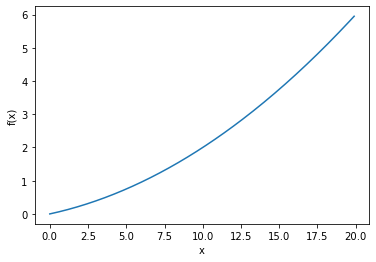

In [13]:
# 함수 시각화
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1) # 0~20 까지 0.1간격
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [15]:
# f(x)의 미분 (x=5,10일떄)
print(numerical_diff(function_1,5))
print(2*0.01*5+0.1)
print(numerical_diff(function_1,10))
print(2*0.01*10+0.1)

0.1999999999990898
0.2
0.2999999999986347
0.30000000000000004


In [16]:
# 변수가 2개인 함수
def function_2(x) :
    return x[0]**2 + x[1]**2
    # x가 numpy배열 : return np.sum(x**2)



In [17]:
# 편미분 : x0 =3, x1=4 x0에 대한 편미분 
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [18]:
# 편미분 : x0=3, x1=4, x1에 대한 편미분 
def function_tmp2(x1) :
    return 3*3+ x1**2

numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [54]:
# 기울기
def numerical_gradient(f, x) :
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size) :
        tmp_val = x[idx]
        # f(x+h) 계산 
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    
    return grad 

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))


[6. 8.]
[0. 4.]
[6. 0.]


In [27]:
# 경사 하강법
def gradient_descent(f, init_x, lr=0.01, step_num= 100) :
    x = init_x
    
    for i in range(step_num) :           
        grad = numerical_gradient(f,x)     
        x -= lr*grad
        print(x)
    return x

In [28]:
# f(x_0,x_1)=x_0^2+x_1^2
def function_2(x) :
    return x[0]**2 + x[1]**2


init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x = init_x, lr=0.1, step_num=100)


[-2.4  3.2]
[-1.92  2.56]
[-1.536  2.048]
[-1.2288  1.6384]
[-0.98304  1.31072]
[-0.786432  1.048576]
[-0.6291456  0.8388608]
[-0.50331648  0.67108864]
[-0.40265318  0.53687091]
[-0.32212255  0.42949673]
[-0.25769804  0.34359738]
[-0.20615843  0.27487791]
[-0.16492674  0.21990233]
[-0.1319414   0.17592186]
[-0.10555312  0.14073749]
[-0.08444249  0.11258999]
[-0.06755399  0.09007199]
[-0.0540432   0.07205759]
[-0.04323456  0.05764608]
[-0.03458765  0.04611686]
[-0.02767012  0.03689349]
[-0.02213609  0.02951479]
[-0.01770887  0.02361183]
[-0.0141671   0.01888947]
[-0.01133368  0.01511157]
[-0.00906694  0.01208926]
[-0.00725355  0.00967141]
[-0.00580284  0.00773713]
[-0.00464228  0.0061897 ]
[-0.00371382  0.00495176]
[-0.00297106  0.00396141]
[-0.00237684  0.00316913]
[-0.00190148  0.0025353 ]
[-0.00152118  0.00202824]
[-0.00121694  0.00162259]
[-0.00097356  0.00129807]
[-0.00077884  0.00103846]
[-0.00062308  0.00083077]
[-0.00049846  0.00066461]
[-0.00039877  0.00053169]
[-0.00031901  0.

array([-6.11110793e-10,  8.14814391e-10])

In [29]:
# 학습률이 너무 큰 예시 
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

[ 57. -76.]
[-1083.00000003  1444.00000007]
[ 20576.99999267 -27436.00002124]
[-390963.00759858  521284.00215314]
[ 7428296.63595611 -9904396.53983905]
[-1.41137328e+08  1.88183103e+08]
[ 2.68126267e+09 -3.57501690e+09]
[-5.09763373e+10  6.79001831e+10]
[ 9.45170863e+11 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12]
[-2.58983747e+13 -1.29524862e+12

array([-2.58983747e+13, -1.29524862e+12])

In [30]:
# 학습률이 너무 작은 예 : lr =1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

[-3.  4.]
[-3.  4.]
[-3.  4.]
[-3.  4.]
[-3.  4.]
[-3.  4.]
[-3.          3.99999999]
[-3.          3.99999999]
[-2.99999999  3.99999999]
[-2.99999999  3.99999999]
[-2.99999999  3.99999999]
[-2.99999999  3.99999999]
[-2.99999999  3.99999999]
[-2.99999999  3.99999999]
[-2.99999999  3.99999999]
[-2.99999999  3.99999999]
[-2.99999999  3.99999999]
[-2.99999999  3.99999999]
[-2.99999999  3.99999998]
[-2.99999999  3.99999998]
[-2.99999999  3.99999998]
[-2.99999999  3.99999998]
[-2.99999999  3.99999998]
[-2.99999999  3.99999998]
[-2.99999998  3.99999998]
[-2.99999998  3.99999998]
[-2.99999998  3.99999998]
[-2.99999998  3.99999998]
[-2.99999998  3.99999998]
[-2.99999998  3.99999998]
[-2.99999998  3.99999998]
[-2.99999998  3.99999997]
[-2.99999998  3.99999997]
[-2.99999998  3.99999997]
[-2.99999998  3.99999997]
[-2.99999998  3.99999997]
[-2.99999998  3.99999997]
[-2.99999998  3.99999997]
[-2.99999998  3.99999997]
[-2.99999998  3.99999997]
[-2.99999998  3.99999997]
[-2.99999997  3.99999997]
[-2.

array([-2.99999994,  3.99999992])

In [66]:
## 이전에 만들어 놓은 함수 

# softmax 
def softmax(a) :
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

def sigmoid(x) :
    return 1 / (1+np.exp(-x))

In [55]:
 # 간단한 신경망 예시 
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.gradient import numerical_gradient # 책의 내용과 함수가 다름


class simpleNet :
    def __init__(self) :
        self.W = np.random.randn(2,3) # 정규분포로 초기화 (랜덤 행렬 2,3)
    
    def predict(self, x) :
        return np.dot(x, self.W)
    
    def loss(self, x, t) :
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [56]:
net = simpleNet()
print(net.W)

x = np.array([0.6,0.9])
p = net.predict(x) 

print(p)

print(np.argmax(p)) # 최대값의 인덱스 

t = np.array([0, 0, 1])
net.loss(x,t)

[[ 0.84847938  2.54405656 -0.74207406]
 [ 0.84579444 -1.20502867  1.2649686 ]]
[1.27030262 0.44190813 0.6932273 ]
0


2.9052664025473756

In [60]:
# 손실함수
def f(W) :
    return net.loss(x, t)

# 기울기
dW = numerical_gradient(f, net.W)
print(dW)

[[-0.29922906 -0.20658818  0.50581724]
 [-0.44884359 -0.30988227  0.75872586]]


In [61]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[-0.29922906 -0.20658818  0.50581724]
 [-0.44884359 -0.30988227  0.75872586]]


In [62]:
# 2층 신경망 클래스 구현하기 
import sys, os
sys.path.append(os.pardir)
from common.gradient import numerical_gradient

class TwoLayerNet :
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01) :
        # 가중치 초기화
        self.params = {}  # 매개 변수를 보관하는 딕셔너리 
        self.params['W1'] = weight_init_std * \              # 1번째 층의 가중치
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)           # 1번째 층의 편향
        self.params['W2'] = weight_init_std * \              
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x) : # 예측  y = wx + b
        W1,W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t) : # 손실함수의 값 y,t의 cross_entropy_error
        y = self.predict(x)
        return cross_entorpy_error(y,t)
    
    def accuracy(self, x, t) : # 정확도 
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    # x : 입력 데이터, t : 정답 레이블           
    def numerical_gradient(self, x, t) :   # 가중치 매개변수의 기울기를 구함 
        loss_W = lambda W : self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [64]:
# example
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)


(784, 100)
(100,)
(100, 10)
(10,)


In [69]:
# 예측 처리 예시 
x = np.random.rand(100,784) # 더미 입력 데이터
y = net.predict(x)
print(y.shape)

t = np.random.rand(100,10) # 더미 정답 레이블

grads = net.numerical_gradient(x, t) # 기울기 계산

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)


(100, 10)

In [ ]:
# 미니 배치 학습 구현 
import numpy as np
from data.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터 
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1 
network = TwoLayerNet(input_size =784, hidden_size=50, output_size=10)